<a href="https://colab.research.google.com/github/yashraj02/Deep-Learning-OpenCV/blob/master/Cat_Dog_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.preprocessing.image import ImageDataGenerator
image_gen = ImageDataGenerator(rotation_range=30,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               rescale=1/255,
                               shear_range=0.2,
                               zoom_range=0.2,
                               horizontal_flip=True,
                               fill_mode='nearest')

In [0]:
batch_size = 16
input_shape = (150,150,3)

In [24]:
train = image_gen.flow_from_directory('/content/drive/My Drive/Data Science/Cats & Dog CNN/Colab Zip Extracted/dogscats/train',
                                        target_size = input_shape[:2],
                                      batch_size = batch_size,
                                      class_mode='binary')

Found 23000 images belonging to 2 classes.


In [43]:
train.class_indices

{'cats': 0, 'dogs': 1}

In [25]:
test = image_gen.flow_from_directory('/content/drive/My Drive/Data Science/Cats & Dog CNN/Colab Zip Extracted/dogscats/test',
                                        target_size = input_shape[:2],
                                      batch_size = batch_size,
                                      class_mode='binary')

Found 2000 images belonging to 2 classes.


In [0]:
from keras.models import Sequential
from keras.layers import Activation, MaxPooling2D, Flatten, Dropout, Conv2D, Dense

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape = input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape = input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape = input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 18496)            

In [47]:
results = model.fit_generator(train,epochs=10,steps_per_epoch=150,
                              validation_data = test, validation_steps = 12)

Epoch 1/10
 87/150 [================>.............] - ETA: 6:15 - loss: 0.6767 - accuracy: 0.5632

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 848 could not be retrieved. It could be because a worker has died.
  UserWarning)


150/150 [==============================] - 916s 6s/step - loss: 0.6796 - accuracy: 0.5546 - val_loss: 0.6146 - val_accuracy: 0.6198
Epoch 2/10
150/150 [==============================] - 937s 6s/step - loss: 0.6658 - accuracy: 0.5656 - val_loss: 0.7031 - val_accuracy: 0.5833
Epoch 3/10
116/150 [======================>.......] - ETA: 3:31 - loss: 0.6887 - accuracy: 0.5550

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 1016 could not be retrieved. It could be because a worker has died.
  UserWarning)


150/150 [==============================] - 999s 7s/step - loss: 0.6870 - accuracy: 0.5596 - val_loss: 0.6861 - val_accuracy: 0.5625
Epoch 4/10
150/150 [==============================] - 844s 6s/step - loss: 0.6615 - accuracy: 0.5962 - val_loss: 0.6779 - val_accuracy: 0.5781
Epoch 5/10
150/150 [==============================] - 889s 6s/step - loss: 0.6609 - accuracy: 0.6004 - val_loss: 0.6078 - val_accuracy: 0.5885
Epoch 6/10
150/150 [==============================] - 883s 6s/step - loss: 0.6622 - accuracy: 0.5979 - val_loss: 0.6936 - val_accuracy: 0.5729
Epoch 7/10
150/150 [==============================] - 951s 6s/step - loss: 0.6385 - accuracy: 0.6121 - val_loss: 0.6495 - val_accuracy: 0.6927
Epoch 8/10
150/150 [==============================] - 938s 6s/step - loss: 0.6395 - accuracy: 0.6187 - val_loss: 0.6653 - val_accuracy: 0.6510
Epoch 9/10
 53/150 [=========>....................] - ETA: 10:25 - loss: 0.6418 - accuracy: 0.6262

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 920 could not be retrieved. It could be because a worker has died.
  UserWarning)


 93/150 [=================>............] - ETA: 6:29 - loss: 0.6295 - accuracy: 0.6351

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 1053 could not be retrieved. It could be because a worker has died.
  UserWarning)


150/150 [==============================] - 1072s 7s/step - loss: 0.6301 - accuracy: 0.6379 - val_loss: 0.6767 - val_accuracy: 0.4948
Epoch 10/10
 54/150 [=========>....................] - ETA: 11:59 - loss: 0.6696 - accuracy: 0.5810

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 1155 could not be retrieved. It could be because a worker has died.
  UserWarning)


150/150 [==============================] - 768s 5s/step - loss: 0.6584 - accuracy: 0.6042 - val_loss: 0.6345 - val_accuracy: 0.6302


In [48]:
results.history['accuracy']

[0.5545833,
 0.56563544,
 0.5595833,
 0.59625,
 0.60041666,
 0.59791666,
 0.6120833,
 0.61875,
 0.6379167,
 0.6041667]

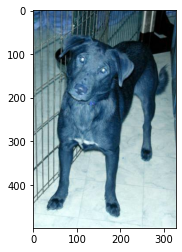

In [58]:
from matplotlib import pyplot as plt
# %matplotlib inline
import cv2 as cv
img = cv.imread('/content/drive/My Drive/Data Science/Cats & Dog CNN/Colab Zip Extracted/dogscats/train/dogs/dog.1.jpg')
plt.imshow(img)

In [49]:
from keras.preprocessing import image
dog_img = image.load_img('/content/drive/My Drive/Data Science/Cats & Dog CNN/Colab Zip Extracted/dogscats/train/dogs/dog.1.jpg',target_size=(150,150))
dog_img = image.img_to_array(dog_img)
print(dog_img.shape)
dog_img = np.expand_dims(dog_img,axis=0)
print(dog_img.shape)
dog_img = dog_img/255

(150, 150, 3)
(1, 150, 150, 3)


In [50]:
from sklearn.metrics import confusion_matrix, classification_report
model.predict_classes(dog_img)

array([[1]], dtype=int32)

In [51]:
model.predict(dog_img)

array([[0.54570085]], dtype=float32)